# Multiple Linear Regression

problem statement :


Build a machine learning model to predict profit of the company  based on different expenses for a given dataset
https://drive.google.com/open?id=1dic5dbHugytxCO6i9pcD6RPod_sLkAUA


In [1]:
#importing necessary library
#importing matplotlib 
import matplotlib.pyplot as plt
#importing seaborn
import seaborn as sea
#importing pandas 
import pandas as pd
#importing numpy
import numpy as np
#importing job-lib
import joblib

#importing scikit learn  library classes
import sklearn.model_selection as model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

# importing one hot encoder from sklearn 
from sklearn.preprocessing import * 
  
# loading csv data from the file given in the url
data_set = pd.read_csv("50_Startups.csv")
#prinding info of data
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### data pre- processing

In [2]:
#getting top 10 records from data set
data_set.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### performing one hot encoding on state column 

In [3]:
# obtaining one hot encoded dataframe of state column
data = pd.get_dummies(data_set['State'])

In [4]:
# concatenating that column into our previous data frame
data_set = pd.concat([data_set,data],axis=1)

In [5]:
# dropping original state column
data_set = data_set.drop(['State'],axis=1)

In [6]:
data_set.head()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


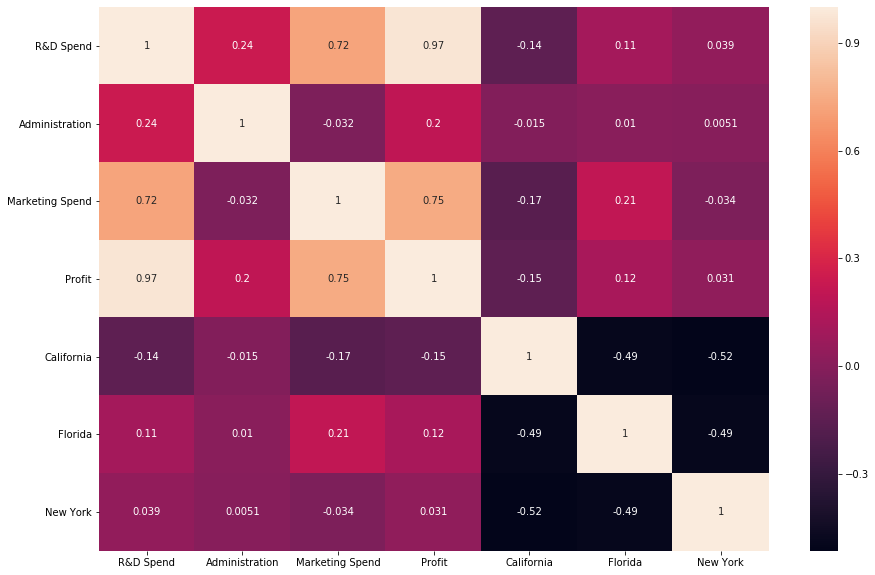

In [7]:
# plotting co relation graph
plt.figure(figsize=(15,10))
sea.heatmap(data_set.corr(),annot = True)

In [8]:
#checking values at data set
data_set.describe()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


In [9]:
# obtaining all the columns from data set
data_set.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'California', 'Florida', 'New York'],
      dtype='object')

#### Splitting data set

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data_set[['Administration', 'Marketing Spend', 'California', 'Florida','New York','R&D Spend']], data_set['Profit'], train_size=0.70,test_size=0.30, random_state=101)

In [11]:
#converting each set into numpy arrays
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

#### Obtaining regression model

In [12]:
#obtaining an object of linear regression class 
regressor = LinearRegression(normalize=False)  
# calling fit method to perform training
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
joblib.dump(regressor,'01_mlr_regressor.pkl')

['01_mlr_regressor.pkl']

In [14]:
#retrieving the intercept:
print(regressor.intercept_)
#retrieving the slope:
print(regressor.coef_)

44209.21233011955
[ 1.96295422e-02  3.51976219e-02 -1.84967985e+03  3.47831368e+03
 -1.62863383e+03  8.01206235e-01]


In [15]:
#predicting the output of test data set
y_pred = regressor.predict(X_test)

In [16]:
#predicting the output of train data set
y_pred_train = regressor.predict(X_train)

#### Finding different errors and accuracy

In [17]:
#calculating different types of errors 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_pred, y_test))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

Mean Absolute Error: 8353.874382632766
Mean Squared Error: 110145720.56556028
Root Mean Squared Error: 10495.033137897197


In [18]:
#determining R 2 score of test data sets
r_2_score = regressor.score(X_test,y_test)
print(r_2_score*100,'%')

92.41937845133175 %


In [19]:
#determining R 2 score of train data set
r_2_score_train = regressor.score(X_train,y_train)
print(r_2_score_train*100,'%')

95.17559349311887 %
